In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
import pandas as pd

In [2]:
df = pd.read_csv('southern_california_min25.csv')
df['timestamp'] = pd.to_datetime(df['time'], errors='coerce', utc=False)
df['Datetime'] = df['timestamp']
df.set_index('timestamp', inplace=True)
df = df.sort_index(ascending=True)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Datetime
timestamp,,,,,,,,,,,,,,,,,,,,,
1977-03-21 04:41:48.760000+00:00,1977-03-21T04:41:48.760Z,34.234667,-117.099333,2.29,2.65,ml,56.0,33.0,NaN,0.34,...,"3km NNE of Running Springs, CA",earthquake,0.34,0.75,0.238,4.0,reviewed,ci,ci,1977-03-21 04:41:48.760000+00:00
1977-03-22 05:47:11.650000+00:00,1977-03-22T05:47:11.650Z,33.950000,-116.850667,14.17,2.52,ml,48.0,38.0,NaN,0.30,...,"4km NE of Banning, CA",earthquake,0.34,0.55,0.365,2.0,reviewed,ci,ci,1977-03-22 05:47:11.650000+00:00
1977-03-22 19:03:07.780000+00:00,1977-03-22T19:03:07.780Z,33.387833,-116.426000,6.02,2.70,ml,46.0,37.0,NaN,0.40,...,"15km NNW of Borrego Springs, CA",earthquake,0.38,1.90,0.274,4.0,reviewed,ci,ci,1977-03-22 19:03:07.780000+00:00
1977-03-24 09:25:39.070000+00:00,1977-03-24T09:25:39.070Z,33.251000,-116.103333,11.26,2.51,ml,21.0,67.0,NaN,0.33,...,"12km NNE of Ocotillo Wells, CA",earthquake,0.42,1.30,0.071,2.0,reviewed,ci,ci,1977-03-24 09:25:39.070000+00:00
1977-03-25 11:23:55.830000+00:00,1977-03-25T11:23:55.830Z,33.965333,-116.598000,7.30,2.60,ml,52.0,34.0,NaN,0.31,...,"8km NW of Garnet, CA",earthquake,0.32,0.83,0.279,4.0,reviewed,ci,ci,1977-03-25 11:23:55.830000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-20 08:39:05.760000+00:00,2025-03-20T08:39:05.760Z,33.301167,-116.267000,10.86,3.72,mw,117.0,16.0,0.07069,0.20,...,"11 km ENE of Borrego Springs, CA",earthquake,0.11,0.29,NaN,4.0,reviewed,ci,ci,2025-03-20 08:39:05.760000+00:00
2025-03-20 10:05:06.300000+00:00,2025-03-20T10:05:06.300Z,33.304167,-116.267167,10.46,2.96,ml,109.0,17.0,0.06806,0.20,...,"11 km ENE of Borrego Springs, CA",earthquake,0.11,0.31,0.134,226.0,reviewed,ci,ci,2025-03-20 10:05:06.300000+00:00
2025-03-20 23:29:48.020000+00:00,2025-03-20T23:29:48.020Z,33.294667,-116.280333,10.47,2.53,ml,97.0,20.0,0.07183,0.19,...,"10 km ENE of Borrego Springs, CA",earthquake,0.11,0.30,0.218,28.0,reviewed,ci,ci,2025-03-20 23:29:48.020000+00:00


In [3]:
df = df[['depth', 'mag']]
df

,depth,mag
timestamp,,
1977-03-21 04:41:48.760000+00:00,2.29,2.65
1977-03-22 05:47:11.650000+00:00,14.17,2.52
1977-03-22 19:03:07.780000+00:00,6.02,2.70
1977-03-24 09:25:39.070000+00:00,11.26,2.51
1977-03-25 11:23:55.830000+00:00,7.30,2.60
...,...,...
2025-03-20 08:39:05.760000+00:00,10.86,3.72
2025-03-20 10:05:06.300000+00:00,10.46,2.96
2025-03-20 23:29:48.020000+00:00,10.47,2.53


In [4]:
print(df.isna().sum())

depth    0
mag      0
dtype: int64


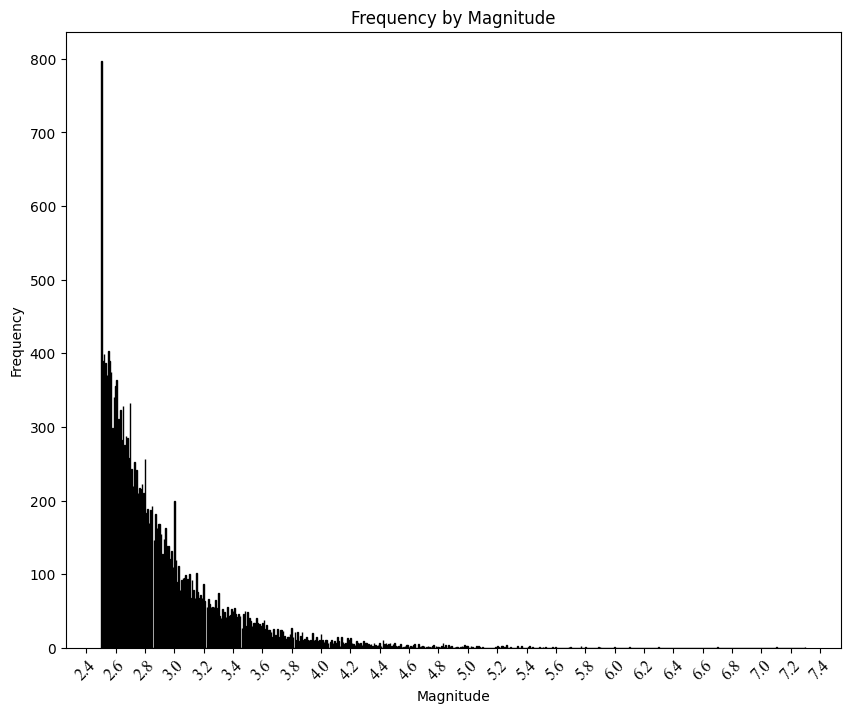

In [5]:
mag_unique, frequency = np.unique(df['mag'], return_counts=True)

plt.figure(figsize=(10,8))
plt.hist(df['mag'], bins=1000, color='black', edgecolor='black')

bins = [0, 20, 40, 60]

from matplotlib.ticker import MultipleLocator
# Set x-axis scale to increment by 0.5
plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))
# Add titles and labels
plt.title('Frequency by Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.xticks(fontsize=12, fontname='Times New Roman', rotation=45)

# Show the plot
plt.show()

In [27]:
mag_filter = 3
depth_filter = 100

In [28]:
# Initialize the 'ED' column with NaN values
df['ED'] = np.nan

# Filter the dataframe for earthquakes with magnitude greater than mag_filter
filtered_df = df[df['mag'] > mag_filter]

n = 50

# Calculate the elapsed days for the last n earthquake events
for i in range(n, len(filtered_df)):
    current_time = filtered_df.index[i]
    past_time = filtered_df.index[i-n]
    elapsed_days = (current_time - past_time).days
    df.loc[current_time, 'ED'] = elapsed_days

# Fill NaN values in 'ED' column
for i in range(len(df)):
    if pd.isna(df.iloc[i]['ED']):
        # Find the latest valid 'ED' value before the current index
        last_valid_index = df.iloc[:i]['ED'].last_valid_index()
        if last_valid_index is not None:
            time_since_last_valid = (df.index[i] - last_valid_index).days
            df.at[df.index[i], 'ED'] = df.at[last_valid_index, 'ED'] + time_since_last_valid

# df = df.dropna(subset=['ED'])
df

,depth,mag,ED,energy,RSRER,b_value,MD,earthquake
timestamp,,,,,,,,
1983-01-31 00:00:00+00:00,6.768200,2.886000,NaN,5.253000e+16,9.016664e+06,1.462805,-4.015164,-1
1983-02-28 00:00:00+00:00,7.205357,2.757857,NaN,1.736699e+17,9.651083e+06,1.435628,-4.166352,-1
1983-03-31 00:00:00+00:00,5.117238,2.717143,NaN,1.807874e+16,1.012543e+07,1.519595,-4.320551,-1
1983-04-30 00:00:00+00:00,5.320933,2.953333,NaN,3.417254e+16,9.902756e+06,1.521083,-4.319793,-1
1983-05-31 00:00:00+00:00,9.455615,2.969231,NaN,4.600987e+16,9.687029e+06,1.391147,-3.963779,-1
...,...,...,...,...,...,...,...,...
2024-11-30 00:00:00+00:00,7.860273,3.054545,5662.0,5.653444e+16,2.083379e+07,0.853729,-4.614263,-1
2024-12-31 00:00:00+00:00,8.876000,2.771000,5693.0,1.112869e+16,1.859838e+07,0.911095,-4.336350,-1
2025-01-31 00:00:00+00:00,9.305625,2.726875,5724.0,8.690267e+15,1.302787e+07,1.121961,-3.924567,-1


In [29]:

# Initialize the 'energy_squared' and 'cumulative_energy_squared' columns with NaN values
df['energy_squared_root'] = np.nan
df['cumulative_energy_squared'] = np.nan

df['energy'] = 10**(11.8+1.5*df['mag'])

# Calculate the energy squared for each data point
df['energy_squared_root'] = np.sqrt(df['energy'])

# Calculate the cumulative sum of energy squared for the last 50 data points
# for i in range(n, len(df)):
#     df.iloc[i, df.columns.get_loc('cumulative_energy_squared')] = df.iloc[i-n:i]['energy_squared_root'].sum()

df['cumulative_energy_squared'] = df['energy_squared_root'].rolling(n).sum()

# Calculate the RSRER
df['RSRER'] = df['cumulative_energy_squared'] / df['ED']

df['mean_mag'] = df['mag'].rolling(n).mean()
df['min_mag'] = df['mag'].rolling(n).min()
df['b_value'] = np.log10(np.e)/(df['mean_mag'] - df['min_mag'])

df['event_counts'] = df['mag'].rolling(n).apply(lambda x: (x > mag_filter).sum(), raw=True)
df['a_value'] = (np.log10(df['event_counts']) + df['b_value']*df['min_mag'])/n
# df['MSD'] = np.sum((np.log10(df['event_counts'])-(df['a_value']-df['b_value']*df['mag']))**2)/(n-1)
df['max_mag'] = df['mag'].rolling(n).max()
df['MD'] = df['a_value']/df['b_value'] - df['max_mag']
# print(df['event_counts'])


# Drop the intermediate columns
df.drop(columns=['energy_squared_root', 'cumulative_energy_squared', 'mean_mag', 'min_mag', 'event_counts', 'a_value', 'max_mag'], inplace=True)

df 

,depth,mag,ED,energy,RSRER,b_value,MD,earthquake
timestamp,,,,,,,,
1983-01-31 00:00:00+00:00,6.768200,2.886000,NaN,1.345860e+16,NaN,NaN,NaN,-1
1983-02-28 00:00:00+00:00,7.205357,2.757857,NaN,8.645412e+15,NaN,NaN,NaN,-1
1983-03-31 00:00:00+00:00,5.117238,2.717143,NaN,7.511286e+15,NaN,NaN,NaN,-1
1983-04-30 00:00:00+00:00,5.320933,2.953333,NaN,1.698244e+16,NaN,NaN,NaN,-1
1983-05-31 00:00:00+00:00,9.455615,2.969231,NaN,1.794098e+16,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...
2024-11-30 00:00:00+00:00,7.860273,3.054545,5662.0,2.408897e+16,1.122150e+06,1.275228,-3.259955,-1
2024-12-31 00:00:00+00:00,8.876000,2.771000,5693.0,9.046904e+15,1.109988e+06,1.288776,-3.260149,-1
2025-01-31 00:00:00+00:00,9.305625,2.726875,5724.0,7.768059e+15,1.098096e+06,1.303263,-3.260352,-1


In [30]:
df.dropna(subset=['RSRER'], inplace=True)
df.isna().sum()

depth         0
mag           0
ED            0
energy        0
RSRER         0
b_value       0
MD            0
earthquake    0
dtype: int64

In [31]:
# def resampler_features(df):
#     # print(df['mag'])
#     filtered_df = df[(df['mag'] >mag_filter) & (df['depth']>depth_filter)]
#     if len(filtered_df)>0:
#         mean_mag = filtered_df['mag'].mean()
#         depth = filtered_df['depth'].mean()
#     else:
#         mean_mag = df['mag'].mean()
#         depth = df['depth'].mean()
#     elapsed_days = df['ED'][df.index.max()]
#     # RSRER = df['RSRER'].mean()
#     return pd.Series([mean_mag, depth, elapsed_days], index=['mag', 'depth', 'elapsed_days'])


# monthly_df = df.resample('1M').apply(resampler_features)
monthly_df = df.resample('1M').mean()
monthly_df = monthly_df.fillna(0)
print(monthly_df)

                               depth       mag      ED        energy  \
timestamp                                                              
2009-05-31 00:00:00+00:00  11.525308  3.080769  8978.0  2.637265e+16   
2009-06-30 00:00:00+00:00  12.098500  2.813000  9008.0  1.045924e+16   
2009-07-31 00:00:00+00:00   9.271750  2.843333  9039.0  1.161449e+16   
2009-08-31 00:00:00+00:00   7.497647  2.866471  9070.0  1.258073e+16   
2009-09-30 00:00:00+00:00   5.543167  2.675000  9100.0  6.493816e+15   
...                              ...       ...     ...           ...   
2024-11-30 00:00:00+00:00   7.860273  3.054545  5662.0  2.408897e+16   
2024-12-31 00:00:00+00:00   8.876000  2.771000  5693.0  9.046904e+15   
2025-01-31 00:00:00+00:00   9.305625  2.726875  5724.0  7.768059e+15   
2025-02-28 00:00:00+00:00  10.397143  3.092143  5448.0  2.742927e+16   
2025-03-31 00:00:00+00:00  11.456875  3.029375  5388.0  2.208323e+16   

                                  RSRER   b_value        MD  ea

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14544\3831989824.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample('1M').mean()


In [47]:
monthly_df['earthquake'] = np.where((monthly_df['mag'] >= mag_filter), 1, 
                            np.where((monthly_df['mag'] < mag_filter), -1, 0))
monthly_df['earthquake'].value_counts()

earthquake
-1    138
 1     53
Name: count, dtype: int64

In [48]:
df = monthly_df
df

,depth,mag,ED,energy,RSRER,b_value,MD,earthquake
timestamp,,,,,,,,
2009-05-31 00:00:00+00:00,11.525308,3.080769,8978.0,2.637265e+16,7.317350e+05,1.323797,-3.185738,1
2009-06-30 00:00:00+00:00,12.098500,2.813000,9008.0,1.045924e+16,7.228534e+05,1.345145,-3.186444,-1
2009-07-31 00:00:00+00:00,9.271750,2.843333,9039.0,1.161449e+16,7.185515e+05,1.352045,-3.186533,-1
2009-08-31 00:00:00+00:00,7.497647,2.866471,9070.0,1.258073e+16,7.100496e+05,1.371730,-3.187219,-1
2009-09-30 00:00:00+00:00,5.543167,2.675000,9100.0,6.493816e+15,7.043755e+05,1.387951,-3.187415,-1
...,...,...,...,...,...,...,...,...
2024-11-30 00:00:00+00:00,7.860273,3.054545,5662.0,2.408897e+16,1.122150e+06,1.275228,-3.259955,1
2024-12-31 00:00:00+00:00,8.876000,2.771000,5693.0,9.046904e+15,1.109988e+06,1.288776,-3.260149,-1
2025-01-31 00:00:00+00:00,9.305625,2.726875,5724.0,7.768059e+15,1.098096e+06,1.303263,-3.260352,-1


In [49]:
import numpy as np

def create_lstm_dataset(df, lookback, n_future):
    """
    Creates an LSTM dataset from the given DataFrame.

    Parameters:
    - df: pandas DataFrame containing features.
    - lookback: Number of past timesteps to include in each X sample.

    Returns:
    - X: 3D NumPy array of shape (samples, lookback, features)
    - Y: 1D NumPy array of shape (samples,)
    """
    data = df.values  # Convert dataframe to NumPy array
    X, Y = [], []
    
    for i in range(len(data) - lookback):
        X.append(data[i:i + lookback, :7])  # First 6 columns
        Y.append(data[(i + lookback):(i + lookback + n_future), 7])     # 7th column as label
    
    return np.array(X), np.array(Y)
look_back = 10
X, Y = create_lstm_dataset(df, lookback=look_back, n_future=1)

print(X.shape)  # (number of samples, lookback, 6)
print(Y.shape)  # (number of samples,)


(181, 10, 7)
(181, 1)


In [50]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (135, 10, 7)
X_val shape: (46, 10, 7)
Y_train shape: (135, 1)
Y_val shape: (46, 1)


In [51]:
# Count occurrences of 0 and 1 in Y_train
unique_train, counts_train = np.unique(Y_train, return_counts=True)
print("Y_train counts:", dict(zip(unique_train, counts_train)))

# Count occurrences of 0 and 1 in Y_val
unique_val, counts_val = np.unique(Y_val, return_counts=True)
print("Y_val counts:", dict(zip(unique_val, counts_val)))

Y_train counts: {-1.0: 98, 1.0: 37}
Y_val counts: {-1.0: 31, 1.0: 15}


In [52]:
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [53]:
# import tensorflow as tf
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout

# from tensorflow.keras.optimizers.legacy import Adam

# from tensorflow.keras.regularizers import L1L2
# from tensorflow.keras.layers import Layer, Dense, Dot, Activation

# from tensorflow.keras.callbacks import Callback, EarlyStopping

# from tensorflow.keras import backend as K

# from matplotlib import pyplot as plt

# K.clear_session()

   
# l1 = 0.0001
# l2 = 0.0001

# lstm_dropout = 0.2
# recurrent_dropout = 0.1
# dense_dropout = 0.2
# loss = 'mse'

# n_target = Y_train.shape[-2:]

# regularization_criteria = L1L2(l1=l1, l2=l2)

# n_target_y = Y_train.shape[-1]

# def build_model(input_shape):
#     input_layer = Input(shape=input_shape, name='Input_1')
#     sequence = input_layer
#     sequence = LSTM(20, return_sequences = True,  name="LSTM-1", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(input_layer)
#     sequence = Flatten()(sequence)
#     # sequence = Dropout(dense_dropout)(sequence)
#     # sequence = LSTM(16, return_sequences = False,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(sequence)
#     # sequence = Dense(4, activation = 'tanh', name='Dense_3')(sequence)
#     sequence = Dense(n_target_y, activation = 'tanh', name='Dense_4')(sequence)
#     output_layer = sequence

#     model = Model(inputs=input_layer, outputs=output_layer)

#     return model

# input_shape = (look_back, X_train.shape[2])

# learning_rate = 0.0005

# optimizer = Adam(learning_rate=learning_rate)

# model = build_model(input_shape)
# model.compile(optimizer=optimizer, loss=loss, metrics=[mse, rmse, r_square])
# model.summary()

# import time

# start_time = time.time()

# # early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

# history = model.fit(X_train, Y_train, epochs=700, batch_size=64, validation_data=(X_val, Y_val),
#                     # callbacks=[early_stopping]
#                     )

# end_time = time.time()
# difference_in_seconds = end_time - start_time
# print(f"The difference in seconds is: {difference_in_seconds}")


In [54]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Flatten

def build_model(hp):
    model = keras.Sequential()
    
    model.add(LSTM(units=hp.Int('lstm_units', min_value=8, max_value=64, step=8),
                   return_sequences=True,
                     input_shape=(look_back, X_train.shape[2])))
    
    # model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    model.add(Bidirectional(LSTM(units=hp.Int('bidirectional_units', min_value=4, max_value=32, step=4),
                                 return_sequences=True)))
    
    # model.add(Bidirectional(LSTM(units=hp.Int('bidirectional_units', min_value=4, max_value=32, step=4),
    #                              return_sequences=True)))
    
    model.add(Flatten())
    
    model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
    # model.add(Dense(hp.Float('dense_units', min_value=2, max_value=16, step=2), activation='tanh'))
    
    model.add(Dense(1, activation='tanh'))
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                    loss='mse',
                    metrics=[rmse, r_square])
    
    return model

In [55]:
tuner = kt.RandomSearch(build_model,
                        objective=kt.Objective("val_r_square", direction="max"),
                        max_trials=20,
                        executions_per_trial=1,
                        directory='my_dir',
                        project_name='earthquake')

Reloading Tuner from my_dir\earthquake\tuner0.json


In [56]:
tuner.search(X_train, Y_train, epochs=100, validation_data=(X_val, Y_val))


Search: Running Trial #5

Value             |Best Value So Far |Hyperparameter
16                |8                 |lstm_units
32                |12                |bidirectional_units
0                 |0.3               |dropout
0.01              |0.0001            |learning_rate

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]

print(f"Best LSTM units: {best_hps.get('lstm_units')}")
print(f"Best BiLSTM usage: {best_hps.get('bidirectional_units')}")
print(f"Best Dropout Rate: {best_hps.get('dropout')}")
# print(f"Best Dense Units: {best_hps.get('dense_units')}")
print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train, Y_train, epochs=400, validation_data=(X_val, Y_val))


Best LSTM units: 40
Best BiLSTM usage: 4
Best Learning Rate: 0.01
Epoch 1/400
5/5 [==============================] - 7s 394ms/step - loss: 0.9387 - rmse: 0.9284 - r_square: -0.0328 - val_loss: 0.9695 - val_rmse: 0.9702 - val_r_square: -0.0031
Epoch 2/400
5/5 [==============================] - 0s 54ms/step - loss: 0.9594 - rmse: 0.9317 - r_square: -0.0343 - val_loss: 0.9758 - val_rmse: 0.9706 - val_r_square: -0.0080
Epoch 3/400
5/5 [==============================] - 0s 56ms/step - loss: 0.9516 - rmse: 0.9340 - r_square: -0.0271 - val_loss: 0.9984 - val_rmse: 0.9738 - val_r_square: -0.0329
Epoch 4/400
5/5 [==============================] - 0s 53ms/step - loss: 0.8750 - rmse: 0.8888 - r_square: 0.0480 - val_loss: 1.0041 - val_rmse: 0.9749 - val_r_square: -0.0422
Epoch 5/400
5/5 [==============================] - 0s 52ms/step - loss: 0.8881 - rmse: 0.9016 - r_square: 0.0408 - val_loss: 1.0017 - val_rmse: 0.9711 - val_r_square: -0.0421
Epoch 6/400
5/5 [==============================] - 0s 6

5/5 [==============================] - 1s 13ms/step


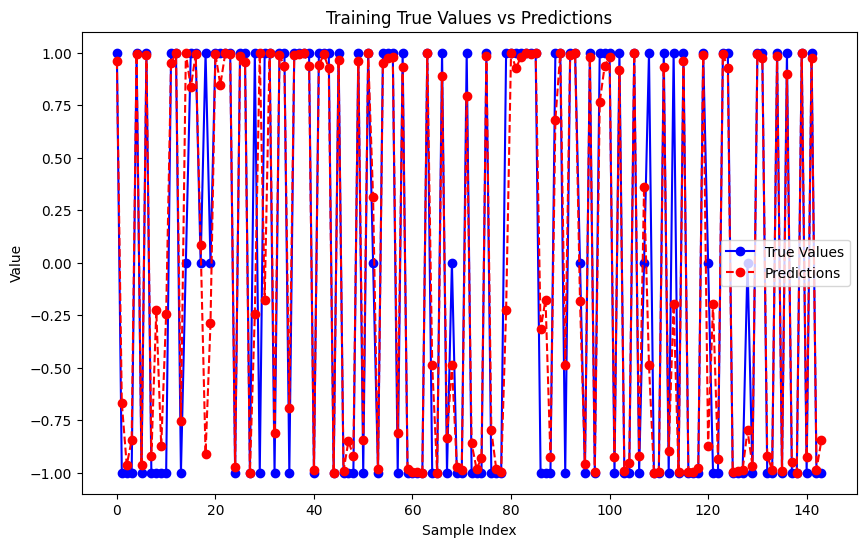

In [ ]:
# Generate predictions for the training set
Y_train_pred = best_model.predict(X_train)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_train, label='True Values', color='blue',  marker='o')
plt.plot(Y_train_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Training True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

2/2 [==============================] - 0s 11ms/step


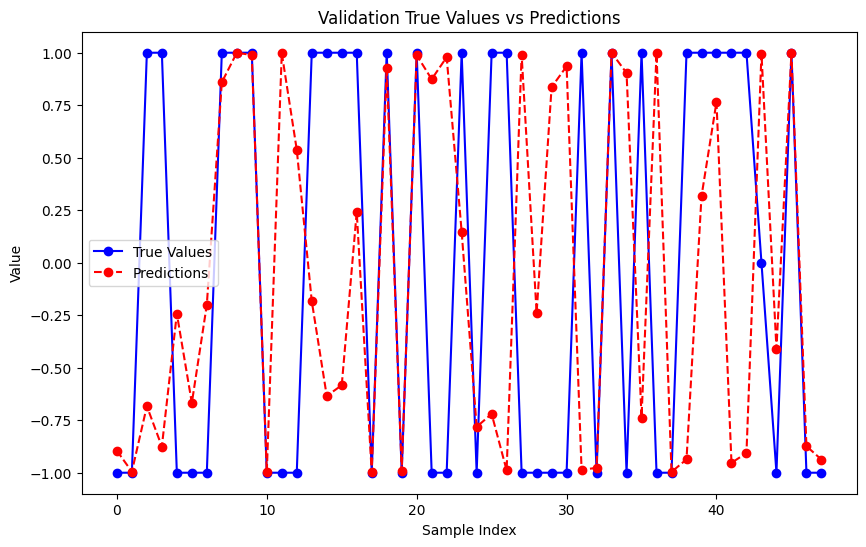

In [ ]:
# Generate predictions for the validation set
Y_val_pred = best_model.predict(X_val)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_val, label='True Values', color='blue', marker='o')
plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Validation True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

2/2 [==============================] - 0s 11ms/step


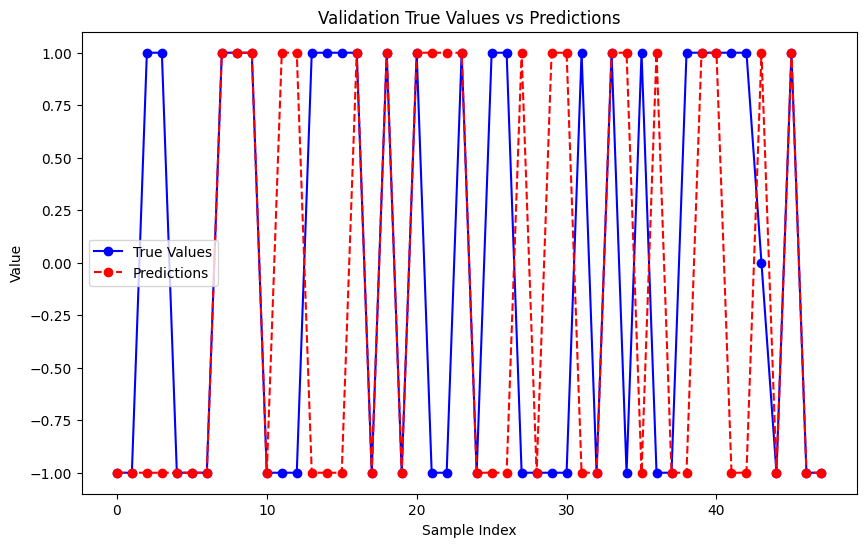

In [ ]:
# Generate predictions for the validation set
Y_val_pred = best_model.predict(X_val)
Y_val_pred = np.where(Y_val_pred > 0, 1, -1)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_val, label='True Values', color='blue', marker='o')
plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Validation True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(Y_val.flatten(), Y_val_pred.flatten())

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[15  0  9]
 [ 0  0  1]
 [12  0 11]]


In [ ]:
# Calculate total accuracy
total_accuracy = np.sum(Y_val.flatten() == Y_val_pred.flatten()) / len(Y_val)
print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

Total Accuracy: 54.17%


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout

# from tensorflow.keras.optimizers.legacy import Adam

# from tensorflow.keras.regularizers import L1L2
# from tensorflow.keras.layers import Layer, Dense, Dot, Activation

# from tensorflow.keras.callbacks import Callback, EarlyStopping

# from tensorflow.keras import backend as K

# from matplotlib import pyplot as plt

# K.clear_session()

   
# l1 = 0.0
# l2 = 0.0

# lstm_dropout = 0.0
# recurrent_dropout = 0.0
# dense_dropout = 0.2
# loss = 'mse'

# n_target = Y_train.shape[-2:]

# regularization_criteria = L1L2(l1=l1, l2=l2)

# n_target_y = Y_train.shape[-1]

# def build_model(input_shape):
#     input_layer = Input(shape=input_shape, name='Input_1')
#     sequence = input_layer
#     sequence = LSTM(40, return_sequences = True,  name="LSTM-1", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(input_layer)
#     sequence = Bidirectional(LSTM(4, return_sequences = True,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout))(sequence)
#     sequence = Flatten()(sequence)
#     sequence = Dropout(dense_dropout)(sequence)
#     # sequence = LSTM(16, return_sequences = False,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(sequence)
#     # sequence = Dense(4, activation = 'tanh', name='Dense_3')(sequence)
#     sequence = Dense(n_target_y, activation = 'tanh', name='Dense_4')(sequence)
#     output_layer = sequence

#     model = Model(inputs=input_layer, outputs=output_layer)

#     return model

# input_shape = (look_back, X_train.shape[2])

# learning_rate = 0.0001

# optimizer = Adam(learning_rate=learning_rate)

# model = build_model(input_shape)
# model.compile(optimizer=optimizer, loss=loss, metrics=[mse, rmse, r_square])
# model.summary()

# import time

# start_time = time.time()

# early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

# history = model.fit(X_train, Y_train, epochs=200, batch_size=64, validation_data=(X_val, Y_val),
#                     callbacks=[early_stopping]
#                     )

# end_time = time.time()
# difference_in_seconds = end_time - start_time
# print(f"The difference in seconds is: {difference_in_seconds}")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_1 (InputLayer)        [(None, 10, 7)]           0         
                                                                 
 LSTM-1 (LSTM)               (None, 10, 40)            7680      
                                                                 
 bidirectional (Bidirectiona  (None, 10, 8)            1440      
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 Dense_4 (Dense)             (None, 1)                 81        
                                                             

5/5 [==============================] - 2s 16ms/step


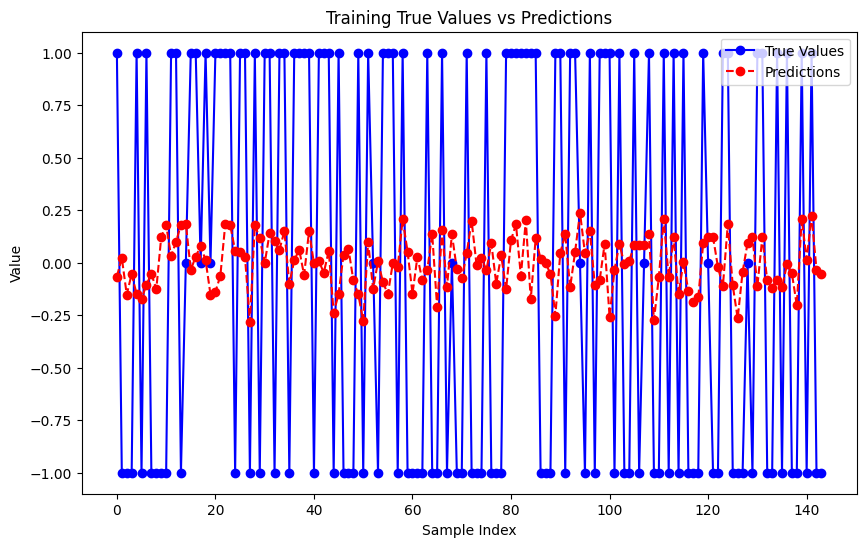

In [ ]:
# # Generate predictions for the training set
# Y_train_pred = model.predict(X_train)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_train, label='True Values', color='blue',  marker='o')
# plt.plot(Y_train_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Training True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

2/2 [==============================] - 0s 11ms/step


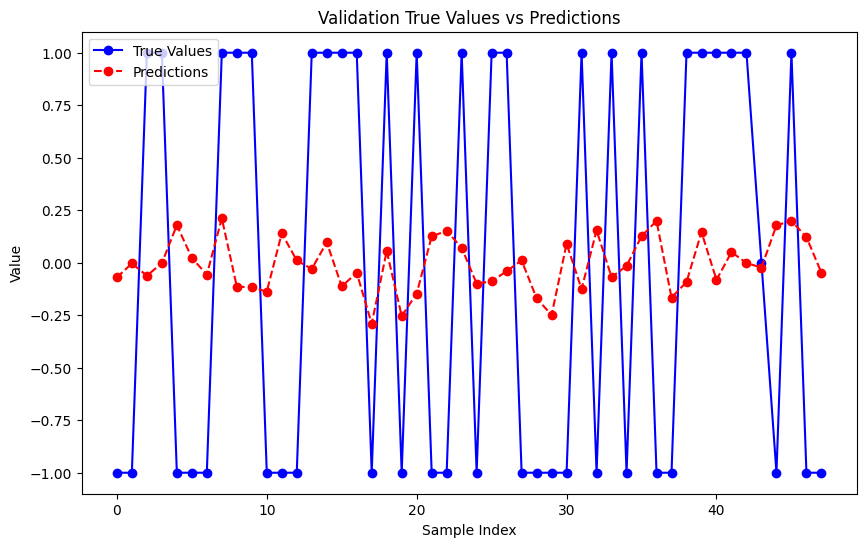

In [ ]:
# # Generate predictions for the validation set
# Y_val_pred = model.predict(X_val)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_val, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

2/2 [==============================] - 0s 16ms/step


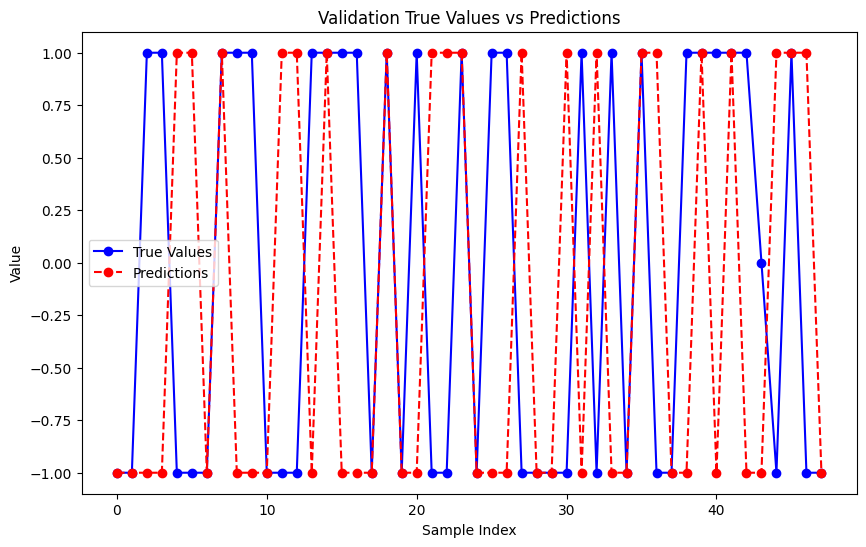

In [ ]:
# # Generate predictions for the validation set
# Y_val_pred = model.predict(X_val)
# Y_val_pred = np.where(Y_val_pred > 0, 1, -1)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_val, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix

# # Create confusion matrix
# conf_matrix = confusion_matrix(Y_val.flatten(), Y_val_pred.flatten())

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

Confusion Matrix:
[[12  0 12]
 [ 1  0  0]
 [15  0  8]]


In [ ]:
# # Calculate total accuracy
# total_accuracy = np.sum(Y_val.flatten() == Y_val_pred.flatten()) / len(Y_val)
# print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

Total Accuracy: 41.67%
